##CONVOLUTIONAL NEURAL NETWORK (MNIST HANDWRITTEN CLASSIFICATION)

---










**KEY TERMS**

**Sequential**==>simplest type of model(linear stack of layers)

**Dense layer**==>regulary and deeply connected 

**Dropout** ==> used to drop out the wirght in order to reduce the overfitting

**Activational function** ==>whether a neuron should be activated or not

**Flatten** ==> flatten the input which doesnot effect the batch size but just converts into 1 dimensional array

**Convo2D**==>for filtering windows for 2d input

**MaxPooling**==> checks the max value and store it in an array of smaller size



#Importing the required libraries and packages

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy import unique,argmax
import seaborn as sns
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np




#Loading the Dataset(MNIST)

In [ ]:
(x_train,y_train),(x_test,y_test)=load_data()

#shape of x_train
print("shape of x_train",x_train.shape)

#shape of y_train
print("shape of y_train",y_train.shape)

#shape of x_test
print("shape of x_test",x_test.shape)

#shape of y_test
print("shape of y_test",y_test.shape)

#reshaping the test and train data  
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1 ))

x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

shape of x_train (60000, 28, 28)
shape of y_train (60000,)
shape of x_test (10000, 28, 28)
shape of y_test (10000,)


##Normalizing the values of pixels of images

In [ ]:
#normalization is done so that the value of each pixel of the image which is unsigned in the range of 0 to 255
x_train=x_train.astype('float32')/255.0
x_test =x_test.astype('float32')/255.0

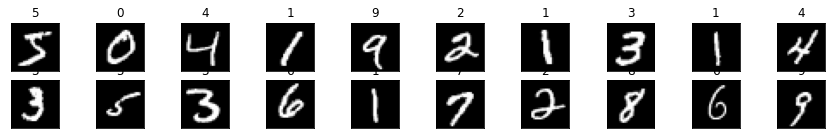

In [ ]:
#first 20 set of images are shown
fig=plt.figure(figsize=(15,3))
for i in range(20):
  ax=fig.add_subplot(3,10,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_train[i]),cmap='gray')
  ax.set_title(y_train[i])

In [ ]:
#shape of the image

img_shape=x_train.shape[1:]
print(img_shape)

(28, 28, 1)


#Building the model

In [ ]:

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=img_shape))
model.add(MaxPool2D(2,2))
model.add(Conv2D(48,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_3 (Flatten)         (None, 1200)            

#Model Architecture

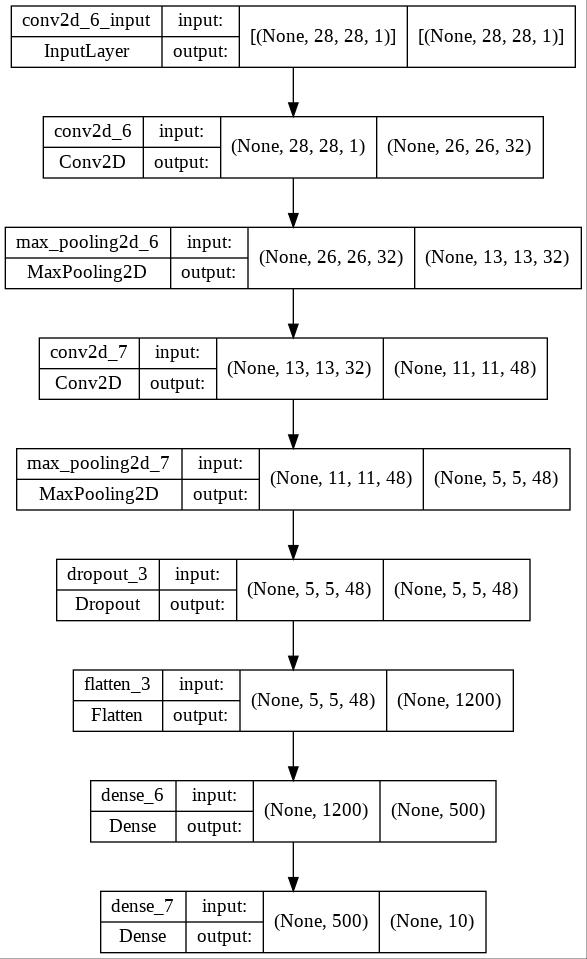

In [ ]:
plot_model(model,'modelimage.jpg',show_shapes=True)

#Training the model

In [ ]:
#verbose=0(silent)
#verbose=1(graphics -------------)
#verbose=2(1/10,2/10,3/10--------)




model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
x=model.fit(x_train,y_train,epochs=15,batch_size=120,verbose=2,validation_split=0.1)

Epoch 1/15
450/450 - 40s - loss: 0.0762 - accuracy: 0.9773 - val_loss: 0.0431 - val_accuracy: 0.9882 - 40s/epoch - 89ms/step
Epoch 2/15
450/450 - 40s - loss: 0.0593 - accuracy: 0.9812 - val_loss: 0.0376 - val_accuracy: 0.9890 - 40s/epoch - 88ms/step
Epoch 3/15
450/450 - 42s - loss: 0.0504 - accuracy: 0.9840 - val_loss: 0.0355 - val_accuracy: 0.9902 - 42s/epoch - 94ms/step
Epoch 4/15
450/450 - 45s - loss: 0.0433 - accuracy: 0.9859 - val_loss: 0.0343 - val_accuracy: 0.9898 - 45s/epoch - 100ms/step
Epoch 5/15
450/450 - 43s - loss: 0.0435 - accuracy: 0.9862 - val_loss: 0.0295 - val_accuracy: 0.9927 - 43s/epoch - 95ms/step
Epoch 6/15
450/450 - 39s - loss: 0.0388 - accuracy: 0.9874 - val_loss: 0.0423 - val_accuracy: 0.9887 - 39s/epoch - 88ms/step
Epoch 7/15
450/450 - 40s - loss: 0.0387 - accuracy: 0.9876 - val_loss: 0.0311 - val_accuracy: 0.9915 - 40s/epoch - 89ms/step
Epoch 8/15
450/450 - 40s - loss: 0.0398 - accuracy: 0.9874 - val_loss: 0.0328 - val_accuracy: 0.9908 - 40s/epoch - 89ms/step

#Accuracy

In [ ]:
loss, accuracy=model.evaluate(x_test,y_test,verbose=2)
print(f'Accuracy: {accuracy*100}')

313/313 - 3s - loss: 0.0320 - accuracy: 0.9902 - 3s/epoch - 11ms/step
Accuracy: 99.01999831199646


#Testing

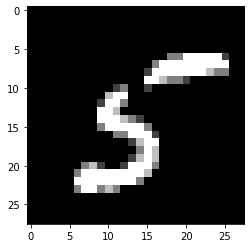

In [ ]:
image=x_train[47]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

In [ ]:
test_predictions = model.predict(x_test)

##Confusion matrix

In [ ]:
confusion = tf.math.confusion_matrix(y_test,y_test)
confusion

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 980,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1032,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1010,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  982,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  892,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  958,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1028,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  974,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1009]],
      dtype=int32)>

#Checking the predicted value 

In [ ]:
image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p=model.predict([image])
print('Predicted: {}'.format(argmax(p)))

Predicted: 5
